In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

In [4]:
y, sr = librosa.load('./dataset/101/1O.wav',sr=None)
print(y.shape)
print(type(y))
print(sr)

(33323,)
<class 'numpy.ndarray'>
16000


# Display the waveform in the time domain

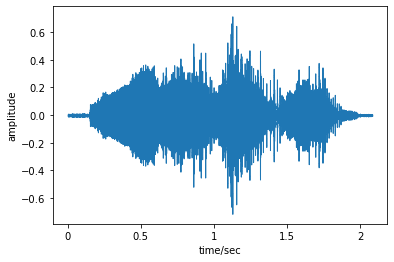

In [3]:
librosa.display.waveshow(y=y,sr=sr,x_axis='time')
plt.xlabel('time/sec')
plt.ylabel('amplitude')
plt.show()

# Display the spectrogram using short-time Fourier transform

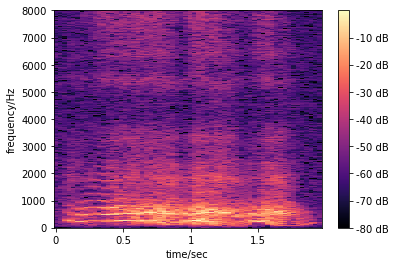

(1025, 62)
[[2.5953799e-03 7.3640933e-03 1.4657786e-02 ... 2.9205328e-05
  1.7501578e-02 2.6132859e-02]
 [1.3871716e-02 5.1731770e-03 1.1365205e-02 ... 1.9828087e-02
  2.7831286e-02 2.6882702e-02]
 [3.4294993e-02 4.0925793e-02 4.2464014e-02 ... 7.9696730e-02
  4.5110513e-02 7.0216566e-02]
 ...
 [1.2018779e-02 3.1205295e-02 3.3742052e-02 ... 5.0441269e-02
  3.8922757e-02 1.8928897e-02]
 [3.1059496e-02 4.3947585e-02 4.2045489e-02 ... 5.2322637e-02
  3.0884579e-02 1.2164901e-02]
 [7.9424102e-03 3.9352216e-02 1.7380813e-02 ... 3.1215629e-02
  2.4028365e-02 1.4361809e-02]]


In [5]:
fig, ax = plt.subplots()
stft = np.abs(librosa.stft(y=y,window='hann',center=False))
s = librosa.amplitude_to_db(stft,ref=np.max)
img = librosa.display.specshow(s,y_axis='linear',x_axis='time',sr=sr)
plt.xlabel('time/sec')
plt.ylabel('frequency/Hz')
fig.colorbar(img, ax=ax, format='%+2.f dB')
plt.show()
print(stft.shape)
print(stft)

The STFT represents a signal in the time-frequency domain by computing discrete Fourier transform (DFT) over short overlapping windows.<br>
This function returns a complex-valued matrix D such that np.abs(D[..., f,t]) is the magnitude of frequency bin f at frame t.

# Display mel-spectrogram

In [6]:
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,fmax=8000)
print(S.shape)
print(type(S))

(128, 66)
<class 'numpy.ndarray'>


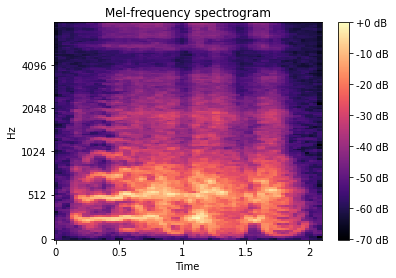

In [7]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel',sr=sr, 
                               fmax=8000,ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

# Display mfcc
计算步骤：
（1）对音频信号进行预加重处理，从而降低部分高频能量。<br>
（2）对预加重处理后的信号进行分帧，加窗处理，一般采用汉明窗<br>
（3）对每一帧信号进行stft，得到频谱<br>
（4）将频谱通过一组按照梅尔刻度设计好的三角形滤波器组，得到带通滤波器后的结果<br>
（5）用对数函数矫正人耳对于声强的非线性<br>
（6）通过逆离散傅里叶变换，取低频部分，得到倒谱分量<br>
（7）得到12个倒谱系数，再加上该帧的能量，得到13个特征，通过计算这13个特征的一阶差分以及二阶差分，最终得到39个特征。这39个特征便是最终的MFCC特征

In [8]:
mfcc = librosa.feature.mfcc(y=y,sr=sr)
print(mfcc.shape)
print(type(mfcc))

(20, 66)
<class 'numpy.ndarray'>


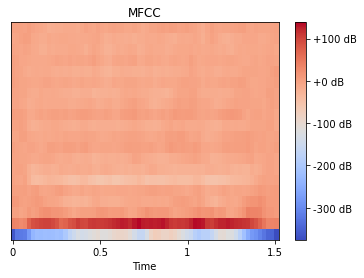

In [9]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc,x_axis='time',ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='MFCC')
plt.show()